<a href="https://colab.research.google.com/github/PhamNguyenDucThienJB/DoAnML_41/blob/main/DoAnMayHoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Đồ Án Machine Learning**
- 1 - Mô tả dữ liệu, các thuộc tính, vẽ các biểu đồ để thấy phân bố của dữ liệu, các vấn đề của dữ liệu, …
 
- 2 - Tiền xử lý dữ liệu (dữ liệu missing, feature selection, discretization, xử lý imbalanced data – nếu cần, …)
- 3 - Lựa chọn thuật toán (ít nhất 4 thuật toán):
 - Neural network (bắt buộc)
 - SVM (sử dụng 1 số kernel khác nhau)
 - kNN
 - Naïve Bayes
 - RandomForest
 - Decision Tree
- 4 - So sánh kết quả các thuật toán dựa trên các metrics:
 - Accuracy,
 - Precision,
 - Recall,
 - F1,
 - Vẽ biểu đồ
- 5 - Báo cáo project: sử dụng slides, trình bày các nội dung theo trình tự trên.

**Phạm Nguyễn Đức Thiện, Lê Minh Nhật**

In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn import svm
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras import Sequential
from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier
from keras.layers import Dense
import numpy as np
import tensorflow
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay



# **Algerian forest fires**

---





# **1. Giới Thiệu**
Bộ dữ liệu "Algerian Forest Fires" là một tập hợp các thông tin về các vụ cháy rừng ở Algeria từ tháng 6 năm 2012 đến tháng 9 năm 2012. 
Bộ dữ liệu bao gồm 244 trường hợp tập hợp dữ liệu của hai vùng của Algeria, cụ thể là khu vực Bejaia nằm ở phía đông bắc của Algeria và khu vực Sidi Bel-Abbes nằm ở phía tây bắc Algeria. 122 trường hợp cho từng khu vực.


# **1.1 Các Thuộc Tính**

*   Bộ dữ liệu bao gồm 11 thuộc tính và 1 thuộc tính đầu ra (lớp)
*    244 trường hợp đã được phân loại thành Lớp Fire (138 lớp) và lớp not Fire (106 lớp).
    

Các Thuộc Tính Bao Gồm:


1.   Date: Ngày ghi nhận thông tin (dạng DD/MM/YYYY).
2.   Temp: Nhiệt độ lúc trưa (nhiệt độ cao nhất) tính bằng độ C: từ 22 đến 42.
3.   RH: Độ ẩm tương đối tính bằng phần trăm: từ 21 đến 90.
4.   Ws: Tốc độ gió tính bằng km/h: từ 6 đến 29.
5.   Rain: Lượng mưa tính bằng mm trong ngày: từ 0 đến 16.8.
6.   Fine Fuel Moisture Code (FFMC): Chỉ số độ ẩm nhiên liệu mịn (Fine Fuel 4.  
     Moisture Code - FFMC) trong hệ thống FWI: từ 28.6 đến 92.5.
7.   Duff Moisture Code (DMC): Chỉ số độ ẩm phế liệu (Duff Moisture Code - DMC) 
     trong hệ thống FWI: từ 1.1 đến 65.9.
8.   Drought Code (DC): Chỉ số hạn hán (Drought Code - DC) trong hệ thống FWI: 
     từ 7 đến 220.4.
9.   Initial Spread Index (ISI): Chỉ số lan truyền ban đầu (Initial Spread  
     Index - ISI) trong hệ thống FWI: từ 0 đến 18.5.
10.   Buildup Index (BUI): Chỉ số tích tụ (Buildup Index - BUI) trong hệ thống 
     FWI: từ 1.1 đến 68.
11.   Fire Weather Index (FWI): Chỉ số thời tiết cháy rừng (Fire Weather Index - 
     FWI): từ 0 đến 31.1.
12.   Classes: Hai lớp (classes), gồm "Fire" (Cháy rừng) và "not Fire" (Không có 
     cháy rừng).

# **1.2 Mục Tiêu**
Mục tiêu của bộ dữ liệu Algerian Forest Fires là dự đoán xem liệu có cháy rừng hay không dựa trên các thông số thời tiết và chỉ số FWI (Fire Weather Index) trong khu vực rừng Algiers của Algieria. Nó có thể được sử dụng để giúp các nhà quản lý rừng và các chuyên gia dự báo cháy rừng đưa ra các quyết định phòng ngừa và kiểm soát cháy rừng.

# **1.3 Giới hạn**


*   Dữ liệu (dataset) được lấy từ UCI Machine Learning Repository
*   Thuật toán máy học được sử dụng để xây dựng các mô hình gồm có:Neural network,SVM (sử dụng 1 số kernel khác nhau)kNN, Naïve Bayes, RandomForest, Decision Tree


# **1.4 Vẽ Các Biểu Đồ Phân Bố Dữ liệu**

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving Algerian_forest_fires_dataset_UPDATE-1.csv to Algerian_forest_fires_dataset_UPDATE-1.csv


In [ ]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE-1.csv')
#Thông tin sơ bộ của 12 đặc trưng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [ ]:
#Thông tin về biến phân lớp
df['Classes  '].value_counts()

fire           138
not fire       106
Name: Classes  , dtype: int64

In [ ]:
#Lấy ra các đặc trưng định lượng
num = df.iloc[:,:-1]

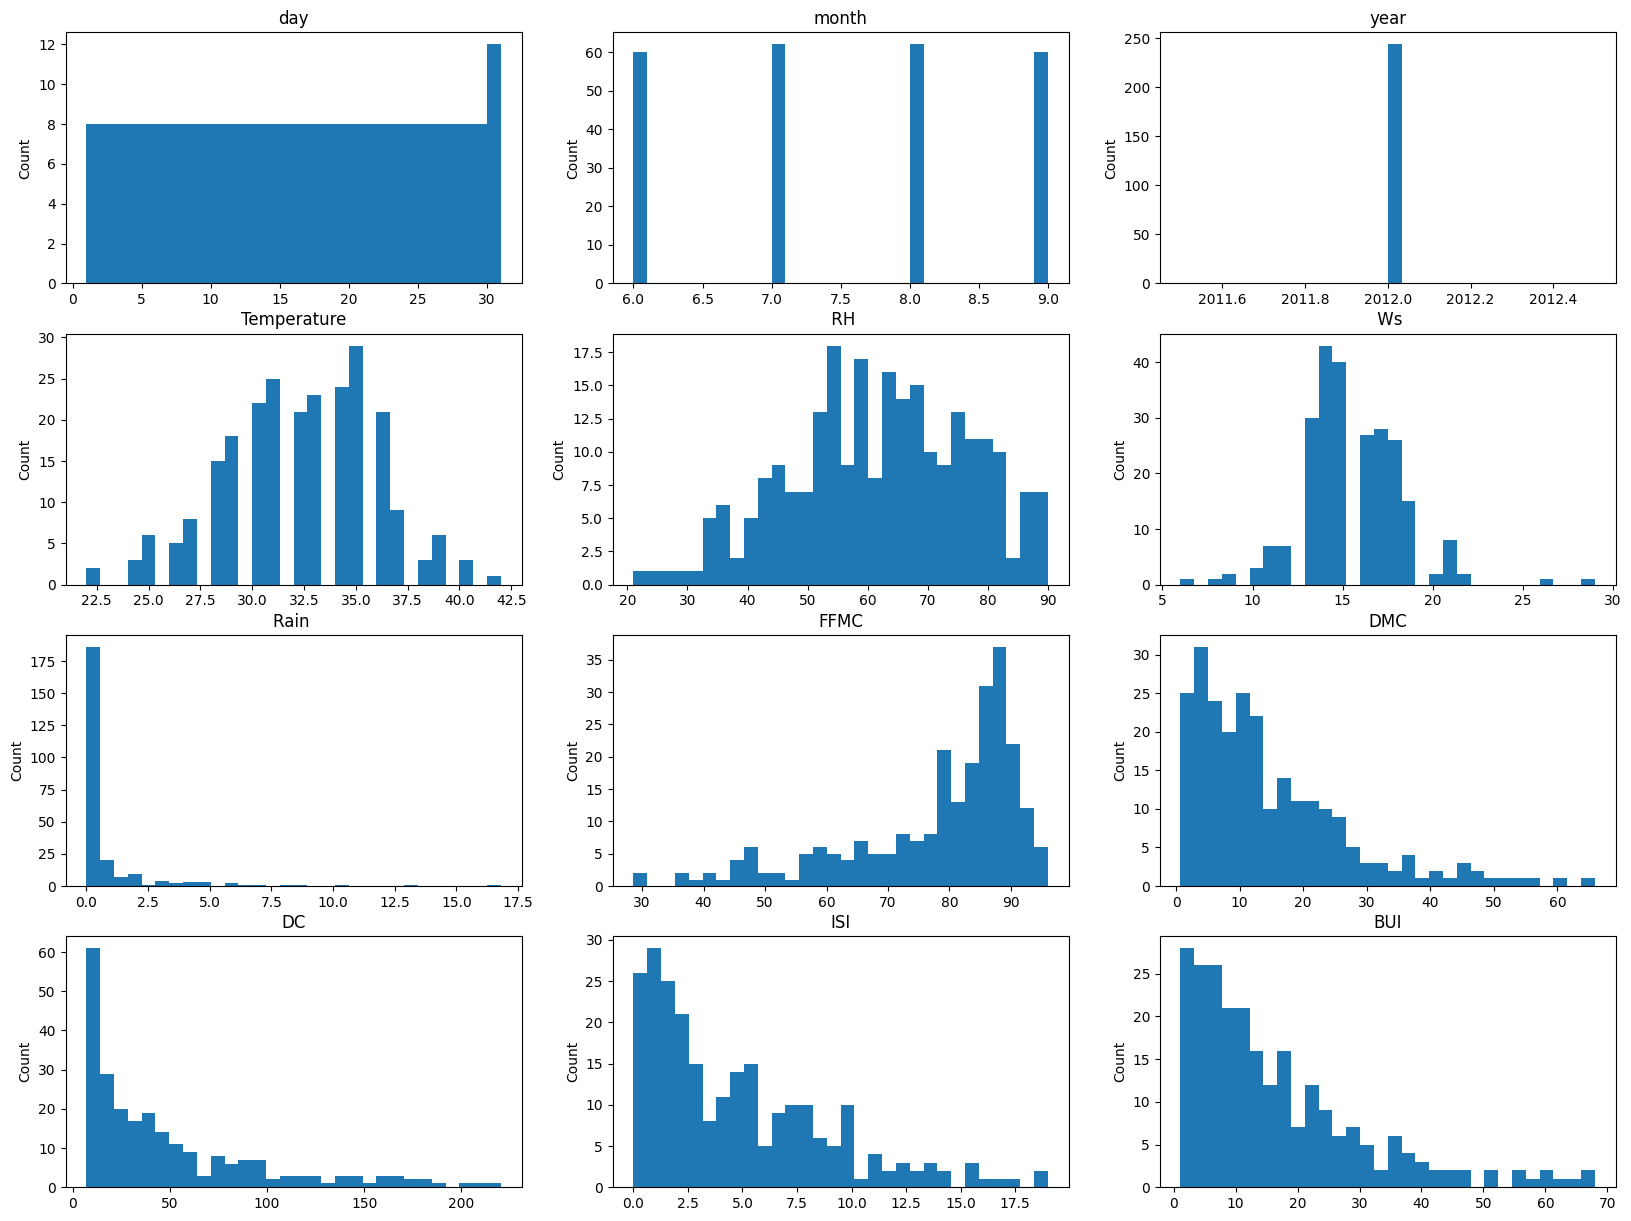

In [ ]:
#Biểu đồ histogram của các đặc trưng định lượng
fig,a =  plt.subplots(4, 3, figsize=(20, 15))

for a, feature in zip(a.flat, num):
    a.hist(df[feature], bins=30)
    a.set_title(feature)
    a.set(ylabel = 'Count')

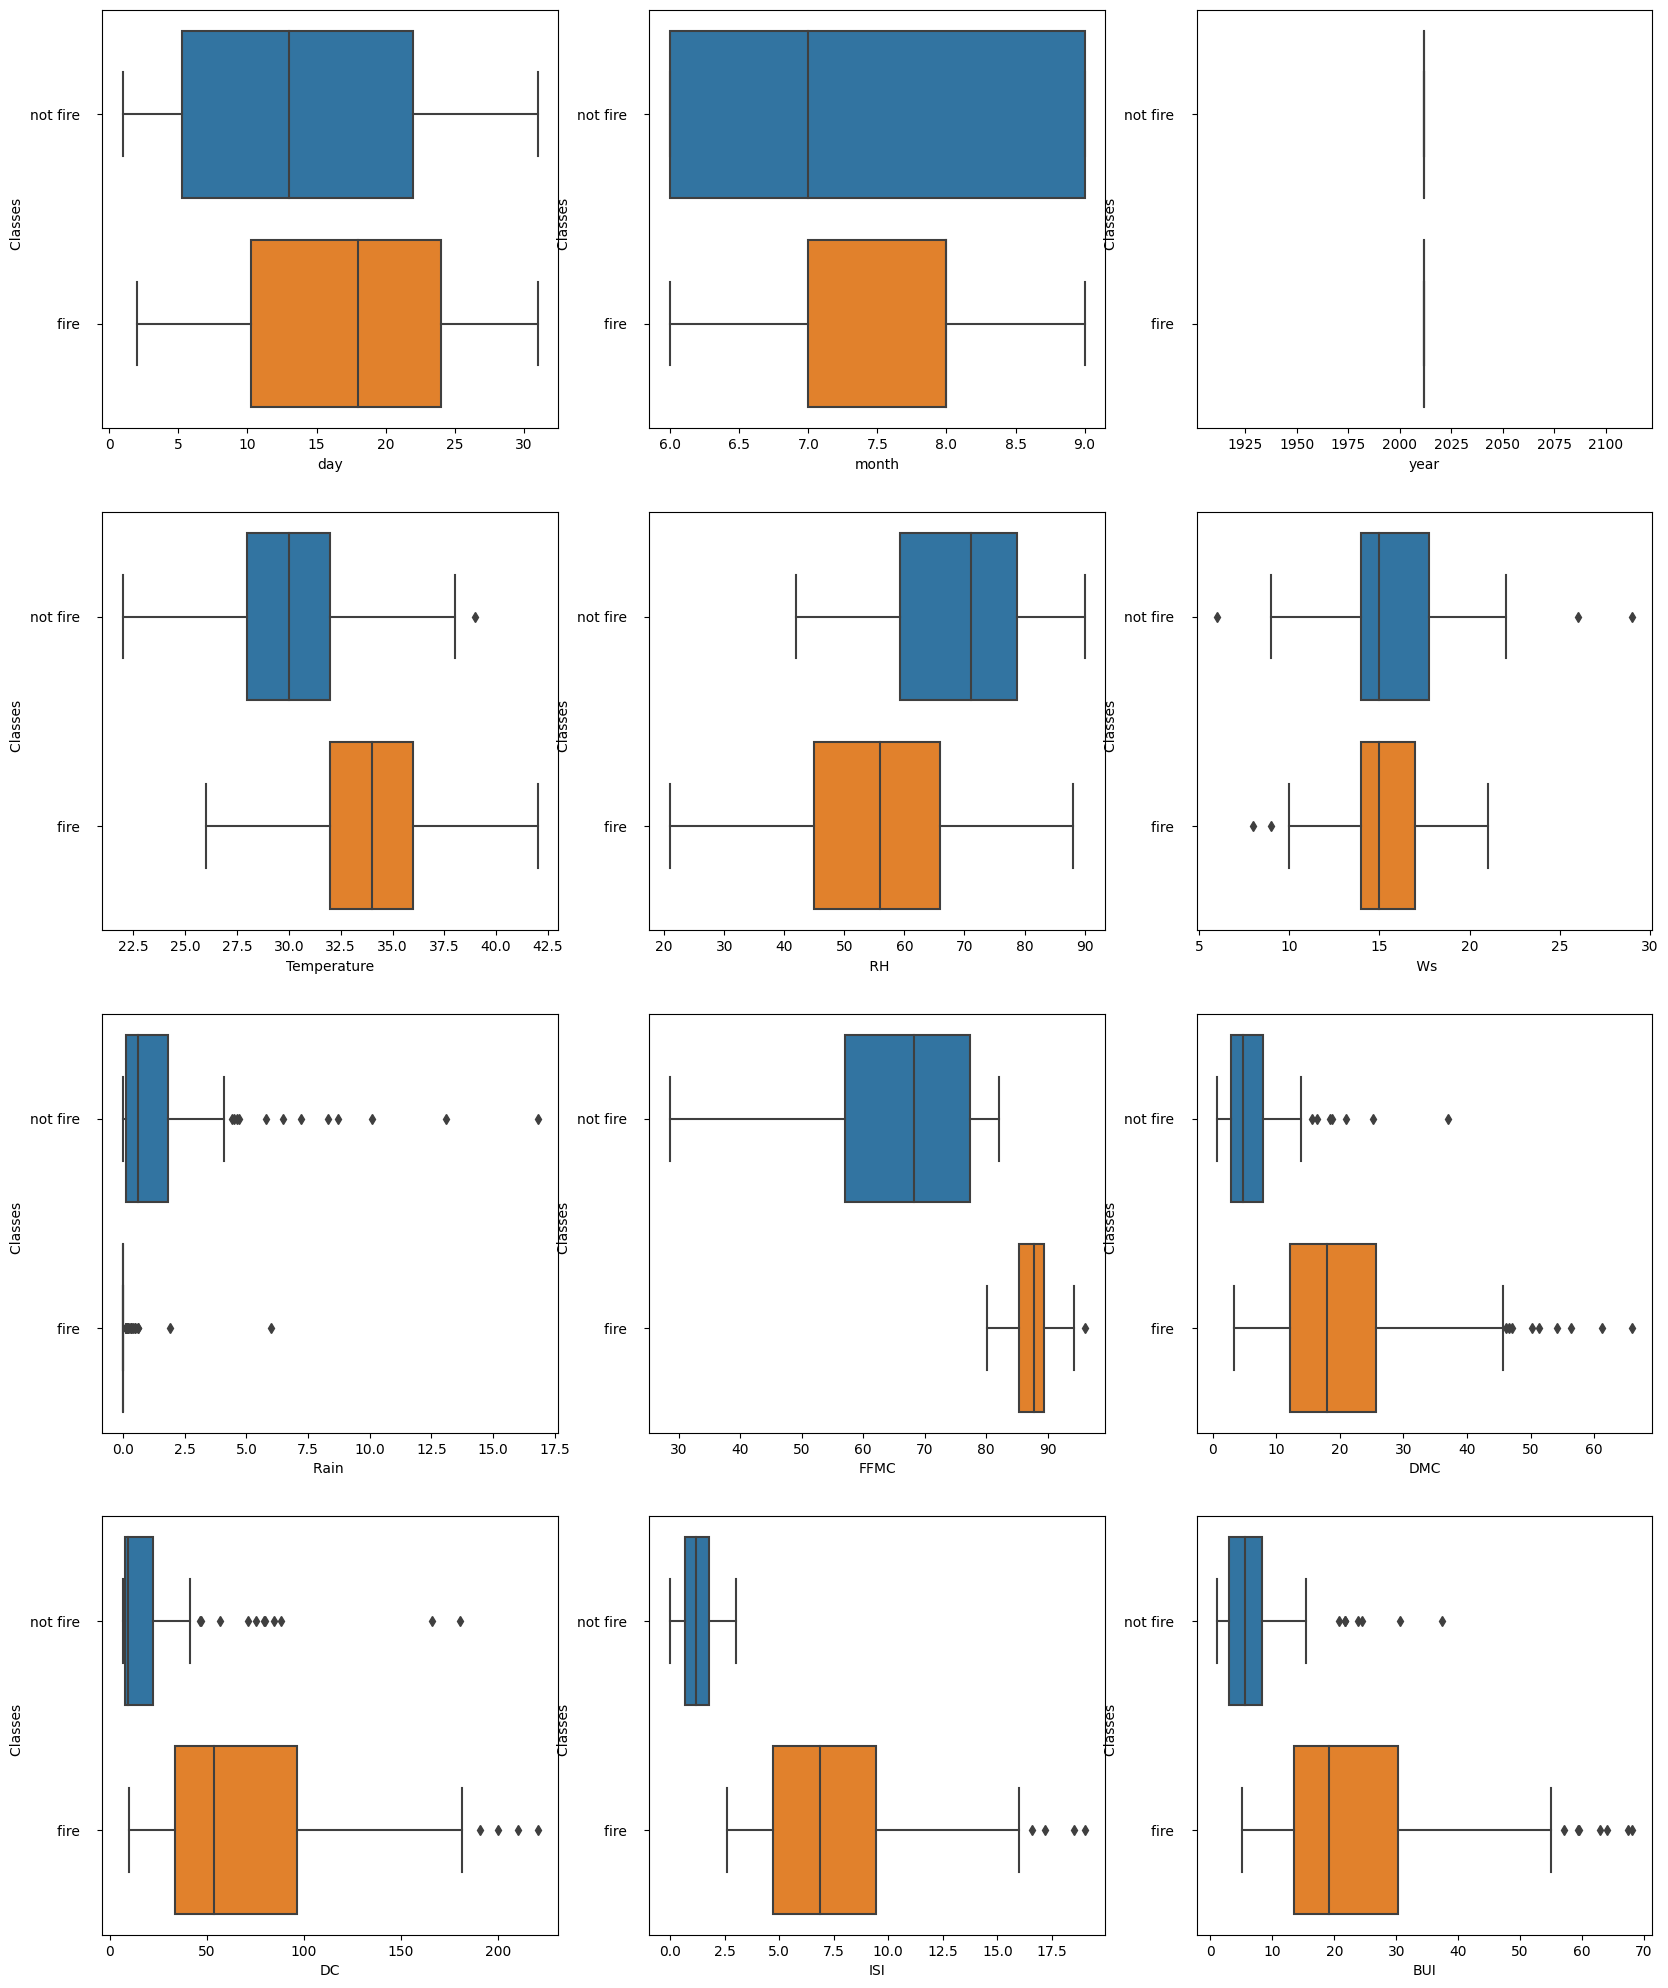

In [ ]:
#Biểu đồ hộp thể hiện giưa đặc trưng định lượng và biến phân lớp
fig, a = plt.subplots(4, 3, figsize=(20,25))

for a, feature in zip(a.flat, num):
    sns.boxplot(ax=a, x=feature, y='Classes  ', data=df, orient='h')

# **1.5 Các Vấn Đề Của Dataset**

Nhóm biểu đồ histogram cho thấy tất cả đặc trưng định lượng đều có phân bố bất thường, không đồng dạng và không cân đối. Điều này gợi ý cần phải thực hiện các phép chuyển đổi để hiệu chỉnh độ xiên (skewness).

Nhóm biểu đồ hộp cho thấy hình dạng có các hộp kỳ dị so với bình thường, chứng tỏ có rất nhiều điểm ngoại lai (outlier) làm ảnh hưởng đến hình dạng cân đối của hộp, có thể cần thực hiện việc loại bỏ các điểm này, hoặc xem xét áp dụng các phương pháp xử lý dữ liệu phù hợp với hiện trạng số lượng điểm ngoại lai lớn.

# **2. Tiền xử lý dữ liệu**

---



**Kiểm Tra dữ liệu còn thiếu**

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64


Vì dataset này không có giá trị trống, ta sẽ không thực hiện bất kỳ tiền xử lý dữ liệu nào liên quan đến missing data.

In [ ]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Có hàng trung lặp:")
    print(duplicate_rows)
else:
    print("Không có hàng trung lặp.")

Không có hàng trung lặp.


**Feature selection**

Vì bộ dữ liệu Algerian Forest Fires có số lượng mẫu( 244) và số lượng thuộc tính (12) là không nhiều nên sẽ không thực hiện bước này.



**Discretization**

Đồ án không thực hiện công việc này, sẽ nghiên cứu khi thích hợp.

**Imbalanced**

In [ ]:
#Thông tin về biến phân lớp
df['Classes  '].value_counts()

fire           138
not fire       106
Name: Classes  , dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

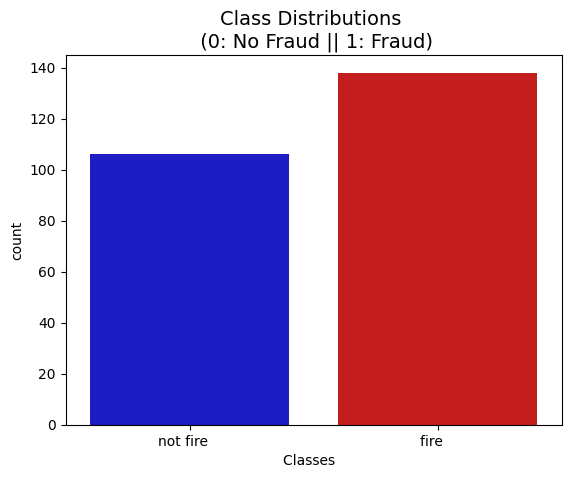

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Classes  ', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Sự chênh lệch về dữ liệu là không quá nhiều giữa 'not fire' (47.32%) và 'fire' (52,68%) nên sẽ không thực hiện tiền xử lý dữ liệu này 


# **3. Các Thuật Toán**

---


**3.1 Neural network (bắt buộc)**


Cross validation scores:  [0.98245614 0.94736842 0.94642857]
Accuracy:  0.972972972972973
Precision:  0.972972972972973
Recall:  0.972972972972973
F1:  0.972972972972973


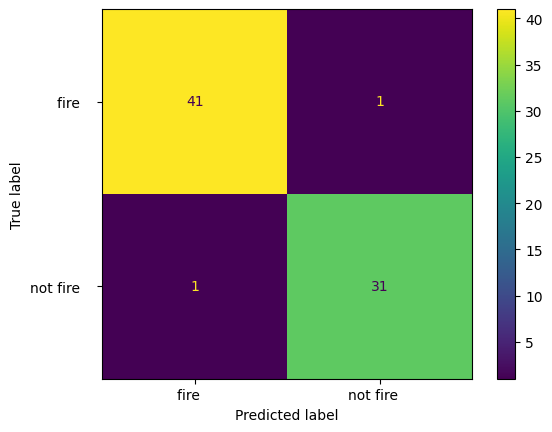

In [ ]:
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#Khởi tạo mô hình
mlp = MLPClassifier(hidden_layer_sizes=(11), solver='lbfgs', alpha=1e-5, random_state=1)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=kf)
# Huấn luyện mô hình
mlp.fit(X_train, y_train )
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_pred = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred, average='micro')
recall_mlp = recall_score(y_test, y_pred, average='micro')
f1_mlp = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_mlp)
print('Precision: ', precision_mlp)
print('Recall: ', recall_mlp)
print('F1: ', f1_mlp)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

**3.2 SVM (sử dụng 1 số kernel khác nhau)**


Cross validation scores:  [0.92982456 0.98245614 0.89285714]
Accuracy:  0.9864864864864865
Precision:  0.9864864864864865
Recall:  0.9864864864864865
F1:  0.9864864864864865


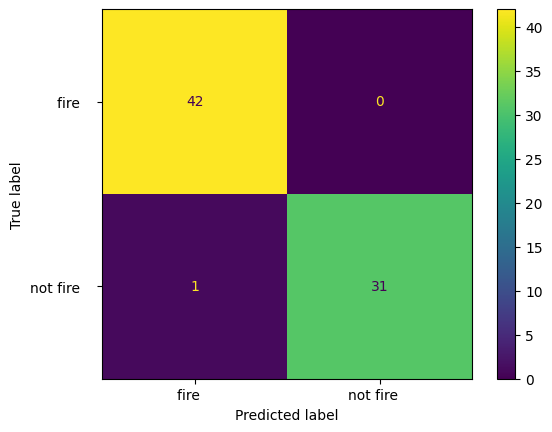

In [ ]:
# SVM với kernel linear
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#Khởi tạo mô hình
svm_linear = SVC(kernel='linear', random_state=0)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_linear, X_train, y_train, cv=kf)
# Huấn luyện mô hình
svm_linear.fit(X_train, y_train )
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_pred = svm_linear.predict(X_test)

accuracy_svm_linear = accuracy_score(y_test, y_pred)
precision_svm_linear = precision_score(y_test, y_pred, average='micro')
recall_svm_linear = recall_score(y_test, y_pred, average='micro')
f1_svm_linear = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_svm_linear)
print('Precision: ', precision_svm_linear)
print('Recall: ', recall_svm_linear)
print('F1: ', f1_svm_linear)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# # SVM với kernel rbf
# svm_rbf = SVC(kernel='rbf', random_state=0)
# build_model(svm_rbf)

Cross validation scores:  [0.9122807  1.         0.91071429]
Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
F1:  0.9459459459459459


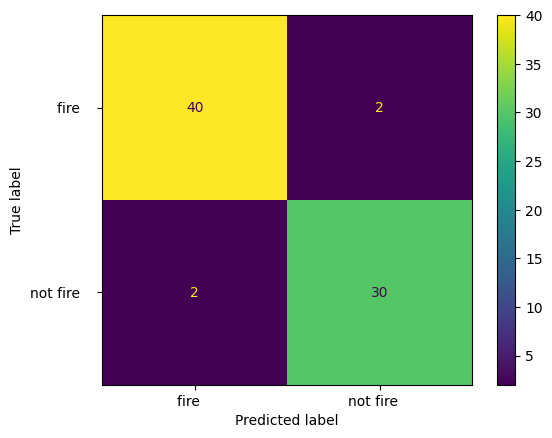

In [ ]:
# SVM với kernel rbf
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#Khởi tạo mô hình
svm_rbf = SVC(kernel='rbf', random_state=0)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_rbf, X_train, y_train, cv=kf)
# Huấn luyện mô hình
svm_rbf.fit(X_train, y_train )
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_pred = svm_rbf.predict(X_test)

accuracy_svm_rbf = accuracy_score(y_test, y_pred)
precision_svm_rbf = precision_score(y_test, y_pred, average='micro')
recall_svm_rbf = recall_score(y_test, y_pred, average='micro')
f1_svm_rbf = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_svm_rbf)
print('Precision: ', precision_svm_rbf)
print('Recall: ', recall_svm_rbf)
print('F1: ', f1_svm_rbf)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

**3.3 kNN**

Cross validation scores:  [0.9122807  0.94736842 0.94642857]
Accuracy:  0.8918918918918919
Precision:  0.8918918918918919
Recall:  0.8918918918918919
F1:  0.8918918918918919


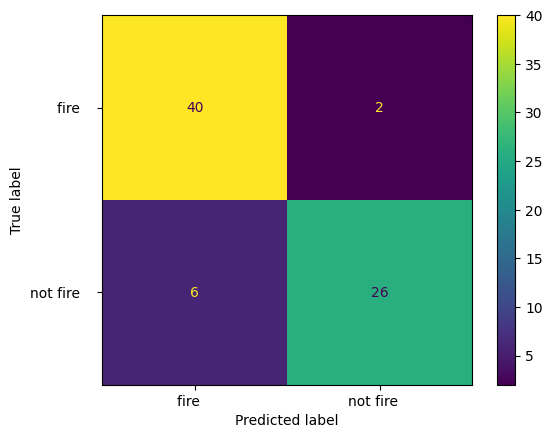

In [ ]:
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#Khởi tạo mô hình
knn = KNeighborsClassifier(n_neighbors=5)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf)
# Huấn luyện mô hình
knn.fit(X_train, y_train )
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='micro')
recall_knn = recall_score(y_test, y_pred, average='micro')
f1_knn = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_knn)
print('Precision: ', precision_knn)
print('Recall: ', recall_knn)
print('F1: ', f1_knn)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

**3.4 Naïve Bayes**


Cross validation scores:  [0.92982456 1.         0.91071429]
Accuracy:  0.9324324324324325
Precision:  0.9324324324324325
Recall:  0.9324324324324325
F1:  0.9324324324324325


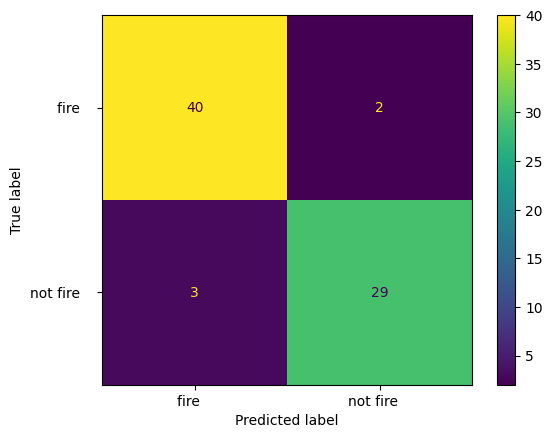

In [ ]:
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#Khởi tạo mô hình
nb_clf = GaussianNB()
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_clf, X_train, y_train, cv=kf)
# Huấn luyện mô hình
nb_clf.fit(X_train, y_train )
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_pred = nb_clf.predict(X_test)

accuracy_nb_clf = accuracy_score(y_test, y_pred)
precision_nb_clf = precision_score(y_test, y_pred, average='micro')
recall_nb_clf = recall_score(y_test, y_pred, average='micro')
f1_nb_clf = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_nb_clf)
print('Precision: ', precision_nb_clf)
print('Recall: ', recall_nb_clf)
print('F1: ', f1_nb_clf)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


**3.5 RandomForest**

Cross validation scores:  [0.96491228 0.96491228 0.96428571]
Accuracy:  0.9864864864864865
Precision:  0.9864864864864865
Recall:  0.9864864864864865
F1:  0.9864864864864865


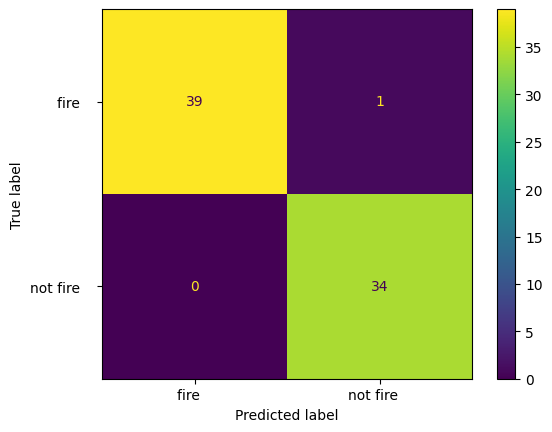

In [ ]:
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Khởi tạo mô hình
rd_clf = RandomForestClassifier(n_estimators=100)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(rd_clf, X_train, y_train, cv=kf)
# Huấn luyện mô hình
rd_clf.fit(X_train, y_train )
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_pred = rd_clf.predict(X_test)

accuracy_rd_clf = accuracy_score(y_test, y_pred)
precision_rd_clf = precision_score(y_test, y_pred, average='micro')
recall_rd_clf = recall_score(y_test, y_pred, average='micro')
f1_rd_clf = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_rd_clf)
print('Precision: ', precision_rd_clf)
print('Recall: ', recall_rd_clf)
print('F1: ', f1_rd_clf)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

**3.6 Decision Tree**

Cross validation scores:  [1.         1.         0.92857143]
Accuracy:  0.972972972972973
Precision:  0.972972972972973
Recall:  0.972972972972973
F1:  0.972972972972973


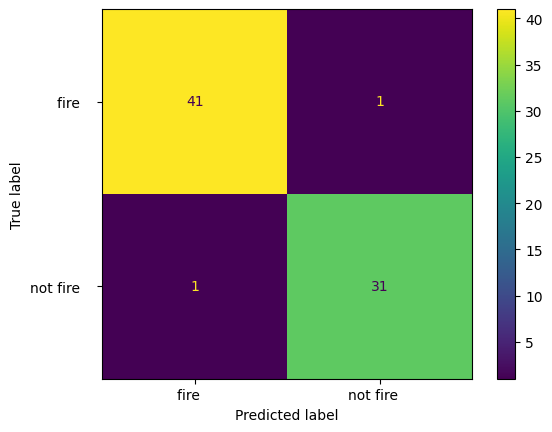

In [ ]:
#Lấy dữ liệu
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (1).csv')    
X = df.drop(['day', 'month', 'year', 'Classes  '], axis=1)
y = df['Classes  ']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#Khởi tạo mô hình
dtree = DecisionTreeClassifier()
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Áp dụng cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtree, X_train, y_train, cv=kf)
# Huấn luyện mô hình
dtree.fit(X_train, y_train)
# Tính toán các metrics Accuracy, Precision, Recall, F1
y_preda = dtree.predict(X_test)

accuracy_dtree = accuracy_score(y_test, y_pred)
precision_dtree = precision_score(y_test, y_pred, average='micro')
recall_dtree = recall_score(y_test, y_pred, average='micro')
f1_dtree = f1_score(y_test, y_pred, average='micro')

# In kết quả
  
print('Cross validation scores: ', cv_scores)
print('Accuracy: ', accuracy_dtree)
print('Precision: ', precision_dtree)
print('Recall: ', recall_dtree)
print('F1: ', f1_dtree)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# **4. So Sánh Kết Quả**

---

In [ ]:
t = PrettyTable(['Algorithm','Accuracy ','Precision','Recall','F1'])
t.add_row(['Neural network ',accuracy_mlp,precision_mlp,recall_mlp,f1_mlp])
t.add_row(['SVM kernel linear ',accuracy_svm_linear,precision_svm_linear,recall_svm_linear,f1_svm_linear])
t.add_row(['SVM kernel rbf ',accuracy_svm_rbf,precision_svm_rbf,recall_svm_rbf,f1_svm_rbf])
t.add_row(['kNN',accuracy_knn,precision_knn,recall_knn,f1_knn])
t.add_row(['Naïve Bayes',accuracy_nb_clf,precision_nb_clf,recall_nb_clf,f1_nb_clf])
t.add_row(['Romdom Forest',accuracy_rd_clf,precision_rd_clf,recall_rd_clf,f1_rd_clf])
t.add_row(['Decision tree',accuracy_dtree,precision_dtree,recall_dtree,f1_dtree])
print(t)

+--------------------+--------------------+--------------------+--------------------+--------------------+
|     Algorithm      |     Accuracy       |     Precision      |       Recall       |         F1         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Neural network    | 0.972972972972973  | 0.972972972972973  | 0.972972972972973  | 0.972972972972973  |
| SVM kernel linear  | 0.9864864864864865 | 0.9864864864864865 | 0.9864864864864865 | 0.9864864864864865 |
|  SVM kernel rbf    | 0.9459459459459459 | 0.9459459459459459 | 0.9459459459459459 | 0.9459459459459459 |
|        kNN         | 0.8918918918918919 | 0.8918918918918919 | 0.8918918918918919 | 0.8918918918918919 |
|    Naïve Bayes     | 0.9324324324324325 | 0.9324324324324325 | 0.9324324324324325 | 0.9324324324324325 |
|   Romdom Forest    | 0.972972972972973  | 0.972972972972973  | 0.972972972972973  | 0.972972972972973  |
|   Decision tree    | 0.972972972972

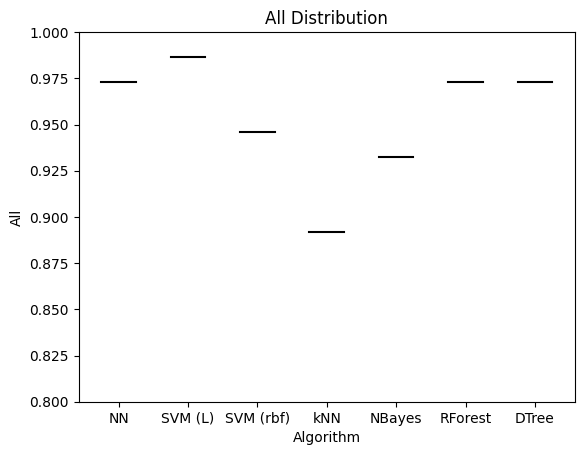

In [ ]:
# Dữ liệu All
accuracy_data = [accuracy_mlp,accuracy_svm_linear , accuracy_svm_rbf, accuracy_knn, accuracy_nb_clf, accuracy_rd_clf, accuracy_dtree]

# Vẽ biểu đồ hộp 
box_plot = []
for i in range(1, 8):
    box_plot.append([i, accuracy_data[i-1]])
plt.figure()
plt.title("All Distribution")
plt.ylabel("All")
plt.xlabel("Algorithm")
plt.xticks([i for i in range(1, 8)], ["NN", "SVM (L)", "SVM (rbf)", "kNN", "NBayes", "RForest", "DTree"])
for i in range(len(box_plot)):
    plt.plot([box_plot[i][0]-0.25, box_plot[i][0]+0.25], [box_plot[i][1], box_plot[i][1]], 'k-')
    # plt.plot([2.75], [value], 'rx')
plt.ylim([0.8, 1])
plt.show()